In [1]:
#   Copyright: © 2020 FRANCISCO JOSÉ MANTELL ZAMUDIO
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

# Apartado 1

In [178]:
#Defino las funciones obtenidas de la ecuacion de autovalores:
def f(x):
    return (-np.tan(0.438*x))

In [179]:
#Para ver graficamente la solucion, evaluo ambas funciones
x = np.arange(0.,20,0.001)
y = x
fx = f(x)

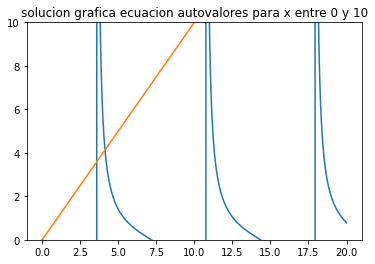

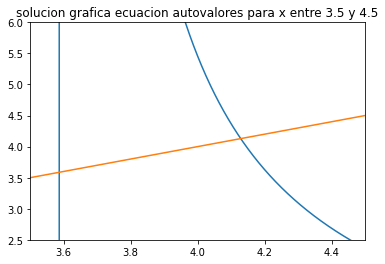

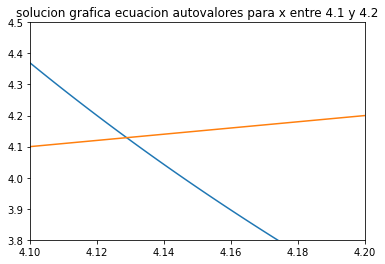

In [184]:
#solucion grafica
plt.figure(1)
plt.plot(x, fx)
plt.plot(x, y)
plt.ylim(0,10)
plt.title('solucion grafica ecuacion autovalores para x entre 0 y 10')
plt.savefig('apartado1.png', bbox_inches='tight')

plt.figure(2)
p1 = plt.plot(x, fx)
p2 = plt.plot(x, y)
plt.ylim(2.5,6)
plt.xlim(3.5,4.5)
plt.title('solucion grafica ecuacion autovalores para x entre 3.5 y 4.5')


plt.figure(3)
p1 = plt.plot(x, fx)
p2 = plt.plot(x, y)
plt.ylim(3.8,4.5)
plt.xlim(4.1,4.2)
plt.title('solucion grafica ecuacion autovalores para x entre 4.1 y 4.2')

plt.show()

In [5]:
#la solucion aproximada es x=4.125, ahora vamos a hacer una biseccion para precisar mejor el resultado
def g(x):
    return (1+(x/np.tan(0.438*x)))
xt = op.bisect(g,4.1,4.2)
xt

4.128814409104233

In [190]:
#calculamos el valor de Vt
E = 2.225 #MeV
Vt = E*(1+(xt**2))
Vt

40.154816245239495

# Apartado 2

In [191]:
#defino funciones utiles
hbarc, bt, m = 197.327, 1.87, 938.279
def k(x,y):
    return np.sqrt(m*(x+y))/hbarc
def alfa(x,y):
    return -x/np.tan(x*y)
def sigma(x,y):
    return (4*np.pi/(x**2))*(1+(x*y))**2

In [195]:
#calculo la seccion eficaz del estado triplete con los resultados del apartado anterior
ktri = k(Vt,E)
alfatri = alfa(ktri,bt)
sigmatri = sigma(alfatri,bt)
sigmatri

297.6372584139139

In [196]:
#A partir del promedio de los estados singlete y triplete calculo la seccion eficaz del estado singlete, conocido el valor 
#experimental
sigmaexp = 2044 #fm^2
sigmasin = (4*sigmaexp)-(3*sigmatri)
#Calculo el valor de as(sin especificar el signo)
Asin = np.sqrt(sigmasin/(4*np.pi))
Asin

24.074254837322105

In [197]:
#Defino las funciones para visualizar graficamente el valor de bs
Vs = 14.6 #MeV
ksin = k(Vs,E)
x1 = np.arange(0.,4,0.001)
xs = x1-(ksin*Asin)  
fs = np.tan(x1)
ksin

0.6367325054409058

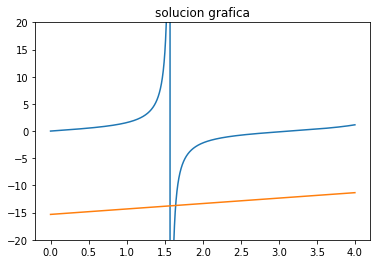

In [199]:
#solucion grafica
plt.figure(4)
plt.plot(x1, fs)
plt.plot(x1, xs)
plt.ylim(-20,20)
plt.title('solucion grafica')
plt.savefig('apartado2.png', bbox_inches='tight')
plt.show()

In [147]:
#biseccion
def y(x):
    return (((x+(ksin*Asin))/np.tan(x))-1)
xsin = op.bisect(y,0,2)
xsin

<ipython-input-147-84e1f3bfdf59>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (((x+(ksin*Asin))/np.tan(x))-1)


1.511484769771414

In [148]:
bs = xsin/ksin
bs

2.3738143676594388

# Apartado 3

In [161]:
En = np.arange(0.0001,11.,0.05) #rango de energias

#seccion eficaz del estado singlete para el rango de energia
ks = k(Vs,En) 
alfas = alfa(ks,En)
sigmas = sigma(alfas,bs)/100
##seccion eficaz del estado triplete para el rango de energia
kt = k(Vt,En)
alfat = (-1/bt)+((bt*(kt**2))/3)
sigmat = sigma(alfat,bt)/100
##seccion eficaz promediada a los dos estados
sigmatot = ((sigmas/4)+(3*sigmat/4))

In [162]:
#seccion en alcance efectivo
kef = k(0,En)
sigmasef = np.pi/((kef**2)+((1/23.175)-(0.5*2.73*(kef**2))**2))
sigmatef = np.pi/((kef**2)+((1/5.423)-(0.5*1.748*(kef**2))**2))

sigmaef = ((sigmasef/4)+(3*sigmatef/4))

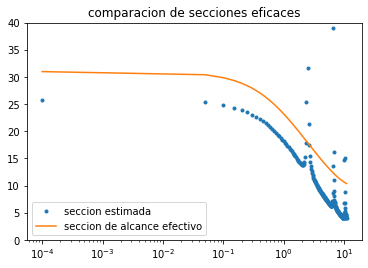

In [176]:
#representacion de ambas para compararlas dentro del rango de energias dado
plt.figure(5)
plt.semilogx(En, sigmatot,'.',label='seccion estimada')
plt.semilogx(En,sigmaef, label='seccion de alcance efectivo')
plt.ylim(0,40)
plt.legend(loc=3)
plt.title('comparacion de secciones eficaces')
plt.savefig('apartado3.png', bbox_inches='tight')
plt.show()